In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


### Load Data and Get High-Level Overview

In [2]:
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
display(df.info(), df.describe().T, df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


None

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### See How Each Feature is Correlated to Target

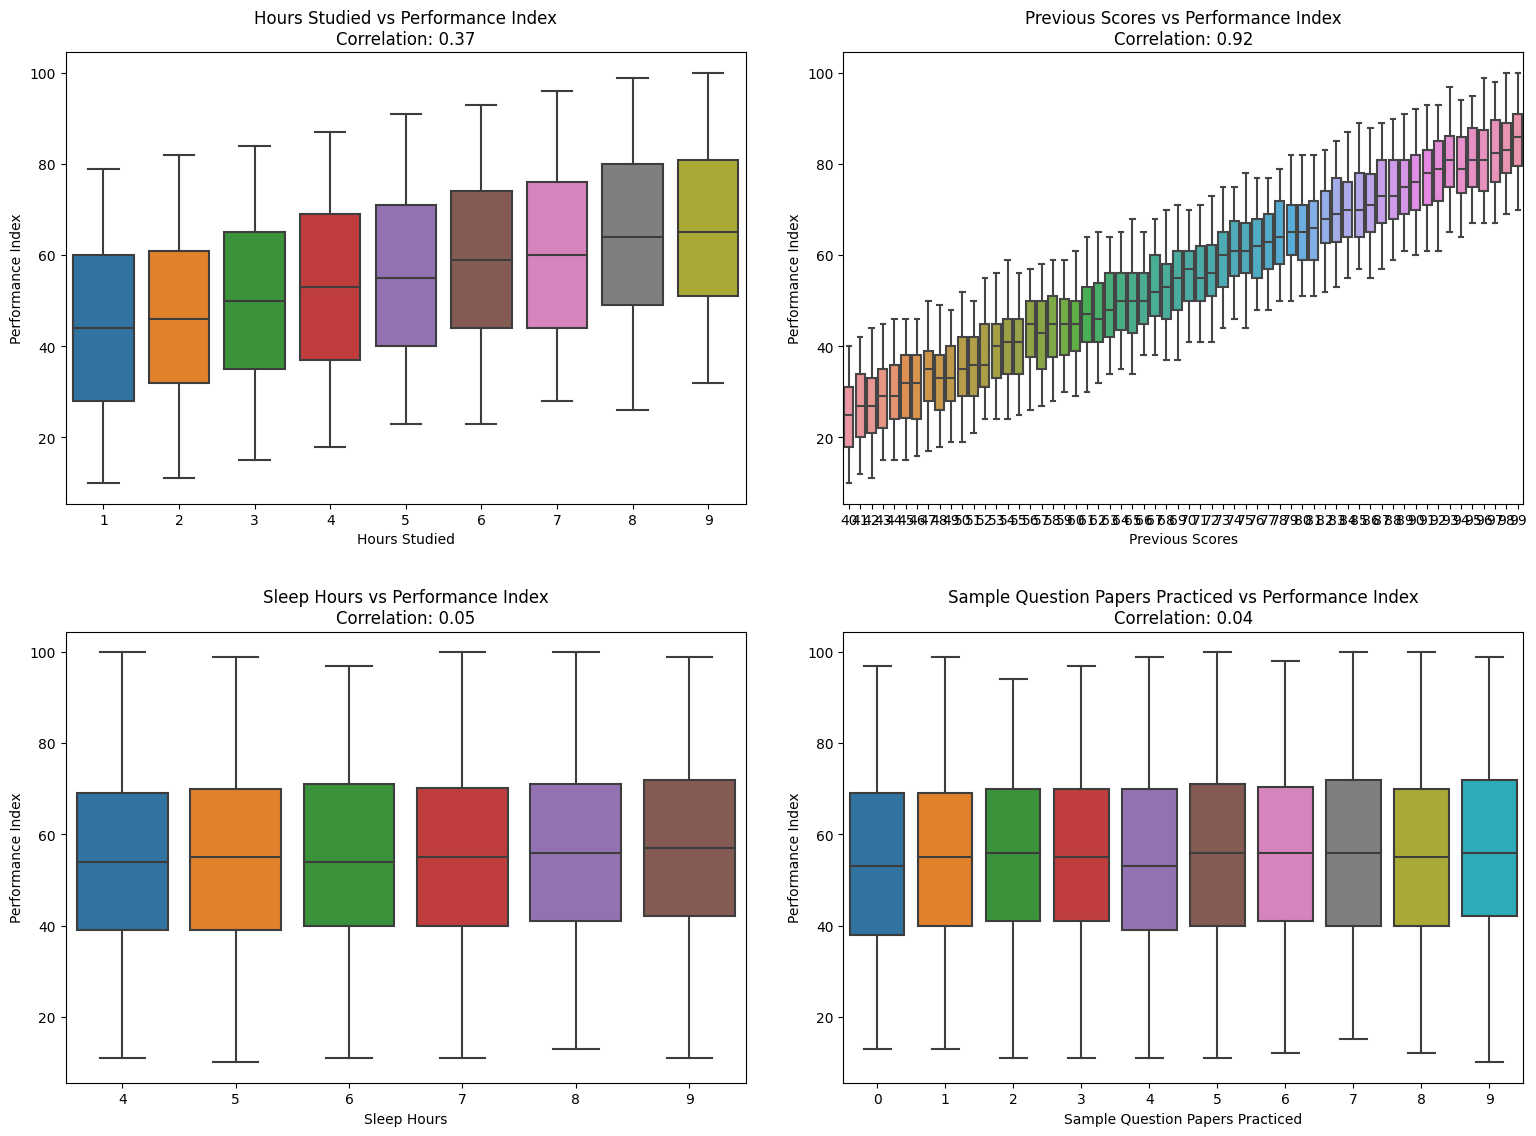

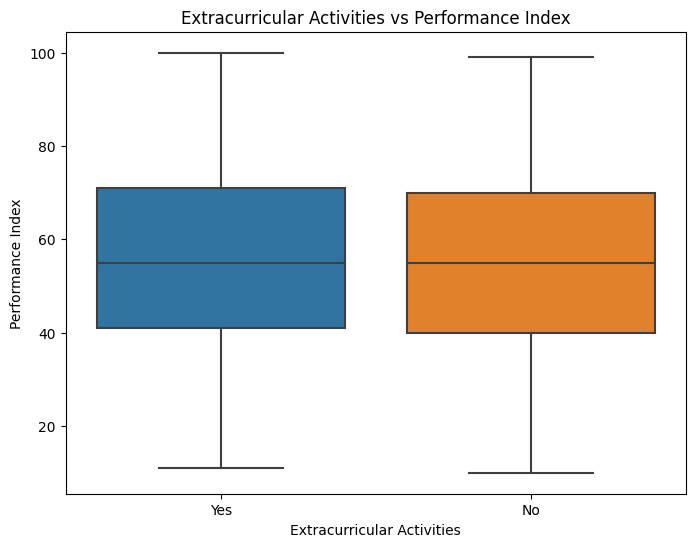

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get only numeric features for correlation scores
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Performance Index')

# Create scatterplots with correlation annotations
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature], y=df['Performance Index'])
    
    # Calculate and display correlation
    corr = df[feature].corr(df['Performance Index'])
    plt.title(f'{feature} vs Performance Index\nCorrelation: {corr:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Performance Index')
    plt.tight_layout(pad=3.0)

# Boxplot of categorical feature
plt.figure(figsize=(8, 6))
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df)
plt.title('Extracurricular Activities vs Performance Index')
plt.show()

### Check the Distribution of Each Column for Skew

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

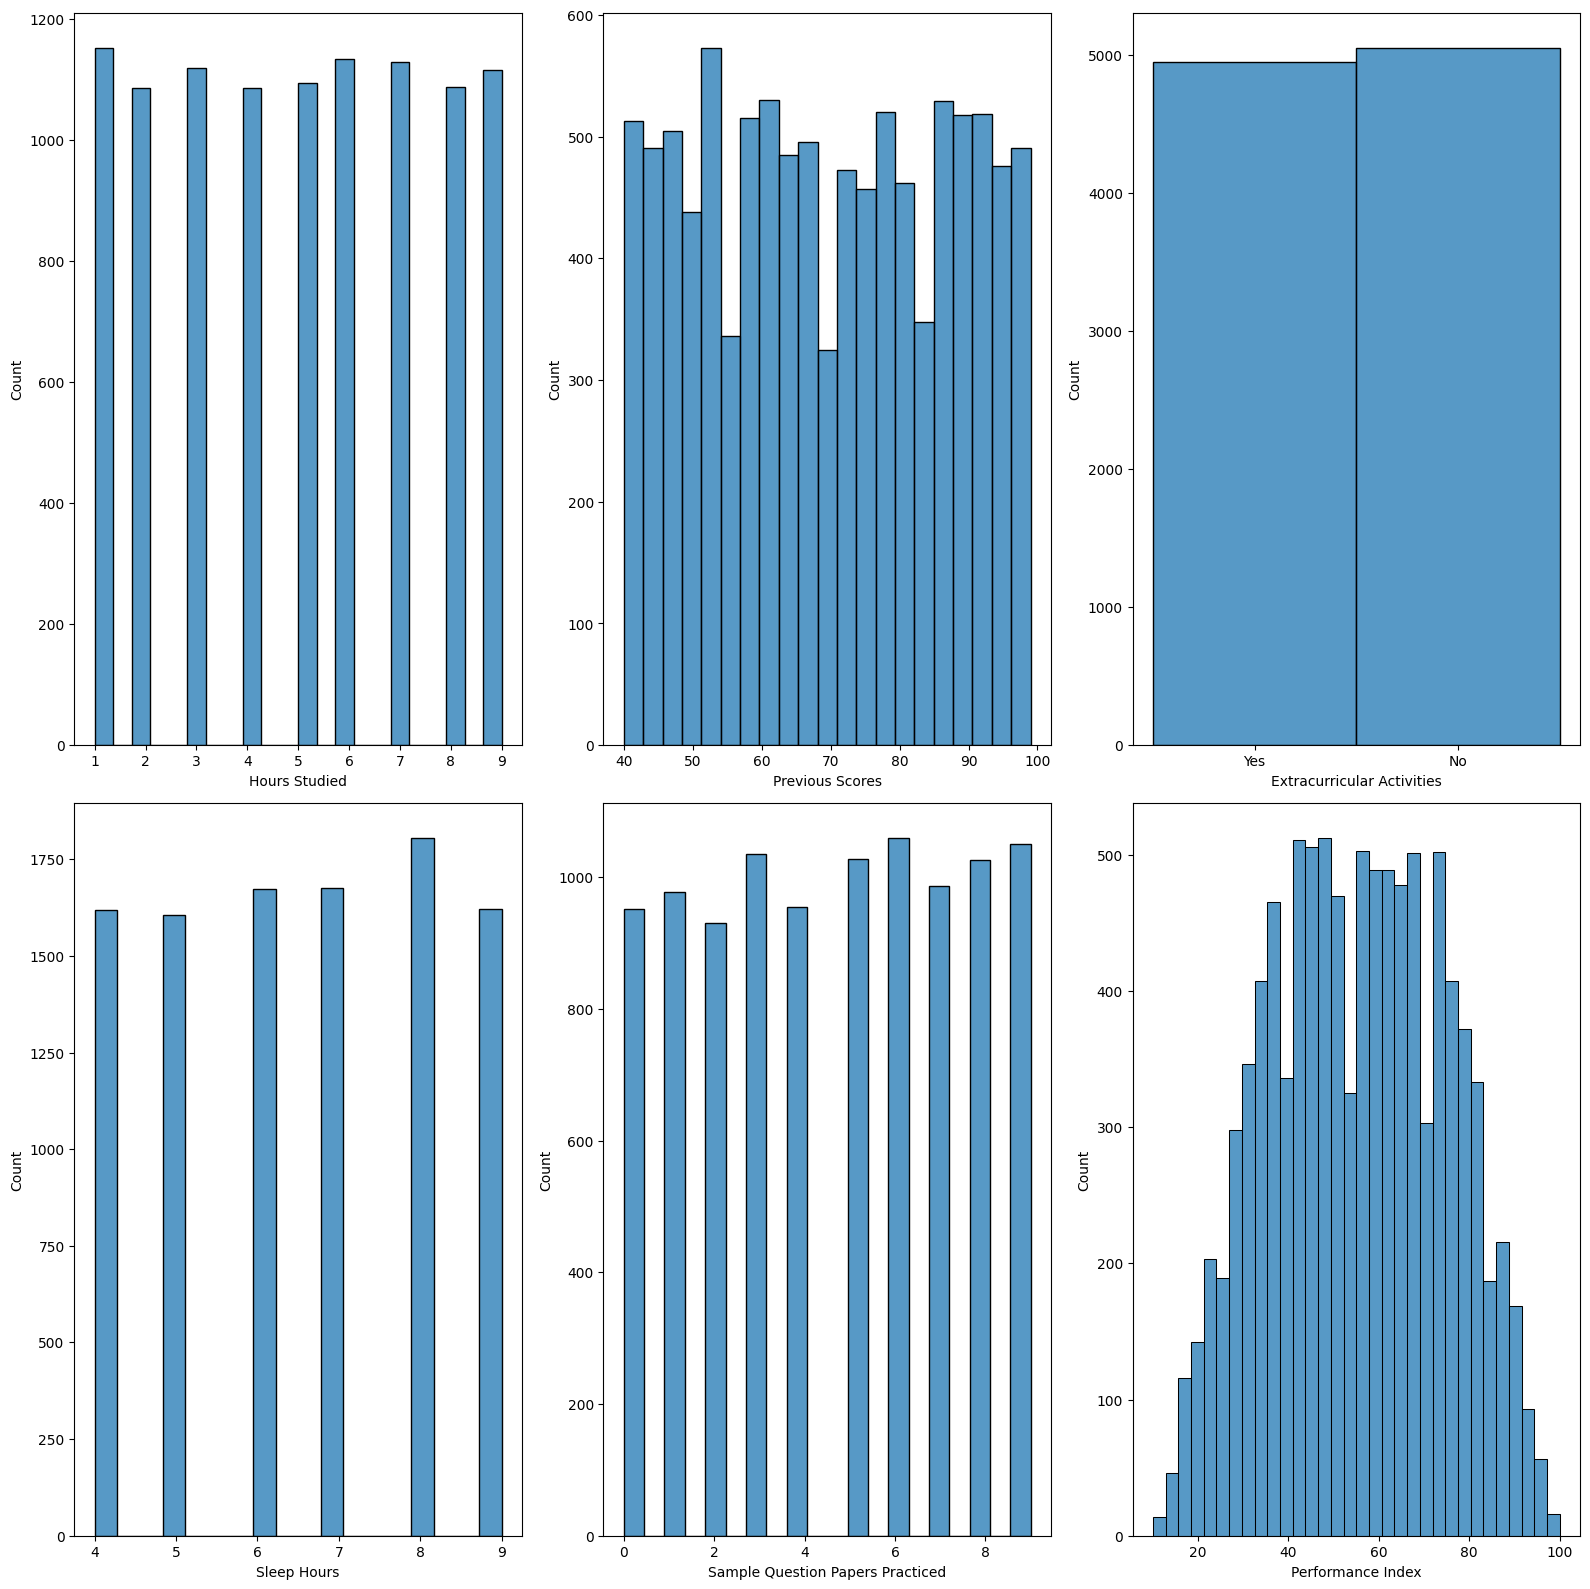

In [4]:
plt.figure(figsize=(16,16))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(2,3,i)
    sns.histplot(data=df, x=df[feature])

plt.tight_layout()
plt.show()

### Label Encode Categorical Feature and Plot Corr. Matrix for Multicollinearity Between Features

<Axes: >

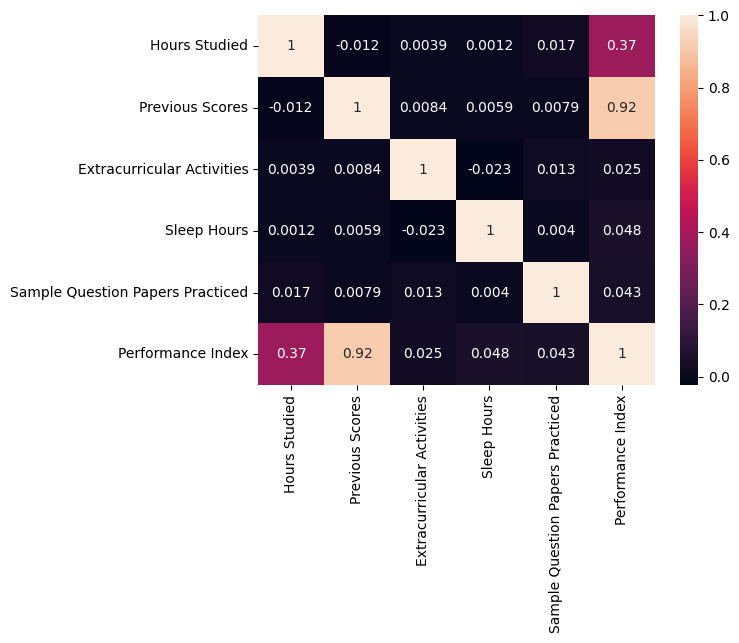

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])
corr = df.corr()
sns.heatmap(corr, annot = True)

### Split Data

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Performance Index")
y = df["Performance Index"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Scale Data

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)

### Feature Selection Using MI Scores

In [8]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k = 'all')
X_train_MI = selector.fit_transform(X_train_scaled, y_train)
X_train_MI = pd.DataFrame(X_train_MI, columns=X_train.columns[selector.get_support()])
X_train_MI.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.006455,-1.183844,-0.989307,0.269888,0.134041
1,-1.149747,-1.241506,1.010808,0.269888,0.483562
2,-1.149747,0.661318,-0.989307,0.269888,-0.914520
3,-1.149747,-1.356828,-0.989307,-0.318906,-1.264041
4,1.162658,-1.299167,-0.989307,1.447477,-1.613561


### Train, Predict, and Evaluate Model using MAE and R2

In [9]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = XGBRegressor(n_estimators=150, max_depth=5, learning_rate=0.05, colsample_bytree = 0.85, 
                     gamma = 0.5, objective = "reg:squarederror", random_state = 42)
model.fit(X_train_MI, y_train)

y_preds = model.predict(X_val_scaled[X_train_MI.columns])

mae = mean_absolute_error(y_val, y_preds)
print(f"Mean Absolute Error: {mae}")

r2 = r2_score(y_val, y_preds)
print(f"R_2 Score: {r2}")

results_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_preds})
print(results_df.head())

Mean Absolute Error: 1.6379742956161498
R_2 Score: 0.9885134789103527
      Actual  Predicted
6252    51.0  55.589790
4684    20.0  22.705645
1731    46.0  48.149189
4742    28.0  30.428846
4521    41.0  42.293140
